In [ ]:
pip install  matplotlib seaborn scipy pandas scikit-learn

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
5  394.12   5.21  28.7  
Linear Regression R2: 0.41625293832656807
Polynomial Regression R2: 0.42513649456074276


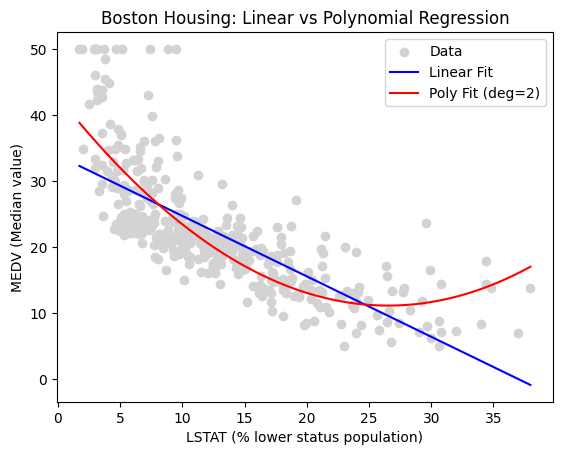

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load Boston Housing data
boston = pd.read_csv('HousingData.csv')
boston = boston.dropna()  # Drop rows with missing values
# Check structure
print(boston.head())

# Use one feature (e.g., LSTAT - % lower status population)
X = boston[['LSTAT']].values  # 2D
y = boston['MEDV'].values     # Median value of owner-occupied homes

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Polynomial Regression (degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluation
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))

# Visualization
plt.scatter(X, y, color='lightgray', label='Data')
x_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.plot(x_range, lin_reg.predict(x_range), color='blue', label='Linear Fit')
plt.plot(x_range, poly_model.predict(x_range), color='red', label='Poly Fit (deg=2)')
plt.xlabel('LSTAT (% lower status population)')
plt.ylabel('MEDV (Median value)')
plt.title('Boston Housing: Linear vs Polynomial Regression')
plt.legend()
plt.show()
